In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [16]:
try:
    conn = sqlite3.connect('../data_raw/flats_14November2021.db')
    cursor = conn.cursor()

    cursor.execute(f"SELECT count(*) FROM flats WHERE flat_area < 32 and flat_area > 0")
    all_ads = cursor.fetchone()[0]
    print(f"\n\tNew ads overall: {all_ads}")

    sql_query = pd.read_sql_query('''SELECT * FROM prices LEFT JOIN flats ON prices.flat_id = flats.flat_id WHERE flat_area < 32 and flat_area > 0''', conn)

    df = pd.DataFrame(sql_query)
    print(df.head(2))

except sqlite3.Error as e:
    raise Exception



	New ads overall: 45220
   price_id  flat_id   price        date  flat_id                      ad_id  \
0         5        4  390000  2021-01-18        4  1004683230600910484697409   
1        35       33  273700  2021-01-18       33  1007105444610910554581809   

                                            title date_posted date_scraped  \
0  Nowa kawalerka do wprowadzenia w chmurach 15p   2019-04-04   2021-01-18   
1          Rondo Wiatraczna, mieszkanie 23,8 m2    2020-03-17   2021-01-18   

                   location      seller property_type  num_rooms  \
0  Praga Południe, Warszawa  Właściciel    Mieszkanie          1   
1  Praga Południe, Warszawa     Agencja    Mieszkanie          1   

   num_bathrooms  flat_area   text  \
0              1         26  Garaż   
1              1         24   Brak   

                                                                                                                                                                                   

In [17]:
columns = ['price_id', 'flat_id', 'price', 'date', 'ad_id', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description', 'photos_links', 'page_address']

num_columns = ['price', 'date', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description']

In [18]:
# df = df[num_columns]

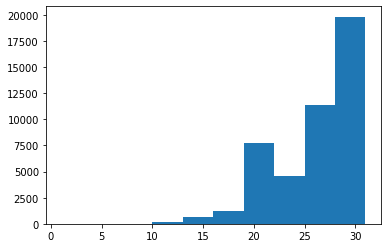

In [19]:
plt.hist(df['flat_area'])
plt.show()

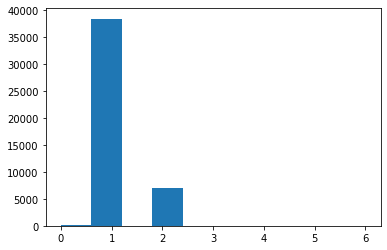

In [20]:
plt.hist(df['num_rooms'])
plt.show()

<AxesSubplot:ylabel='None'>

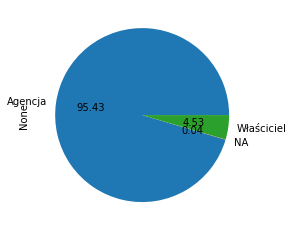

In [21]:
df.groupby('seller').size().plot(kind='pie', autopct='%.2f')

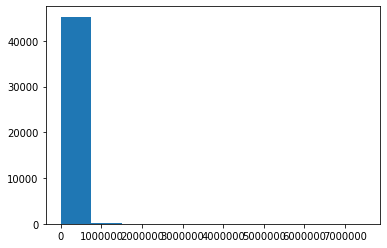

In [22]:
plt.hist(df['price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()



In [23]:
## How other variables relate with our target variable

corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
flat_area        0.503122
num_rooms        0.156203
flat_id          0.152688
flat_id          0.152688
price_id         0.152532
num_bathrooms   -0.039288
Name: price, dtype: float64

In [24]:
max_price = max(df['price'])
print(max_price)

pd.set_option('display.max_colwidth', None)
max_price_df = df[df['price'] == max_price]

print(max_price_df)
print(max_price_df['page_address'])

7500000
      price_id  flat_id    price        date  flat_id  \
8592     67305    66468  7500000  2021-02-23    66468   

                          ad_id                                 title  \
8592  1008936281730912794838909  APARTAMENT W SAMYM SERCU WARSZAWY !    

     date_posted date_scraped               location      seller  \
8592  2021-02-23   2021-02-23  Śródmieście, Warszawa  Właściciel   

     property_type  num_rooms  num_bathrooms  flat_area   text  \
8592    Mieszkanie          1              1         28  Ulica   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Patodeweloperka EDA

In [25]:
df_small = df.copy()
df_small['price_per_m2'] = df_small['price']/df_small['flat_area']
len(df_small)

45539

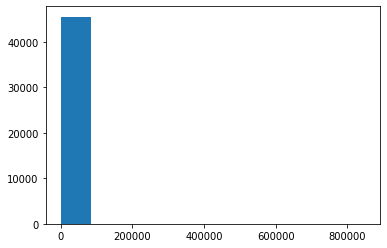

In [26]:
plt.hist(df_small['price_per_m2'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [27]:
from collections import Counter
from spacy.lang.pl.stop_words import STOP_WORDS

In [28]:
small_descriptions = []
for desc in df_small['description']:
    desc = [x.lower() for x  in desc.split()]
    small_descriptions +=  desc

to_replace = r'0123456789.,/\:;-=!@#$%^&*()_+[]{}|'

desc_clean = []

for token in small_descriptions:
    for repl in list(to_replace):
        token = token.replace(repl, ' ').strip()

    if token not in STOP_WORDS:
        desc_clean.append(token)

c = Counter(desc_clean)



In [31]:
# print(c.most_common)

# NLP

In [32]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("pl_core_news_lg")



ModuleNotFoundError: No module named 'pl_core_news_lg'

In [ ]:
from sklearn.model_selection import train_test_split


train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)
# Decision Tree baseline
# KNN Regression
# Random Forest Regression

print(train_set.head())

          price        date  \
6952     520000  2021-01-21   
126307   799000  2021-03-18   
115055  1630000  2021-03-14   
122932   998000  2021-03-17   
138941   650000  2021-03-24   

                                                    title date_posted  \
6952            3 pokoje, Praga-Południe ul Dwernickiego   2021-01-21   
126307               4 pokoje Praga Południe ul. Igańska   2021-03-18   
115055             Apartament 110m + taras 60m2 ! OKAZJA   2021-03-14   
122932  Mieszkanie Warszawa Śródmieście 60m2 (nr: HH-M...  2021-03-17   
138941  Mieszkanie Warszawa Wilanów 51.04m2 (nr: M-971...  2021-03-24   

       date_scraped                  location   seller property_type  \
6952     2021-01-21  Praga Południe, Warszawa  Agencja    Mieszkanie   
126307   2021-03-18  Praga Południe, Warszawa  Agencja    Mieszkanie   
115055   2021-03-14     Śródmieście, Warszawa  Agencja    Mieszkanie   
122932   2021-03-17     Śródmieście, Warszawa  Agencja    Mieszkanie   
138941   2021-

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(train_set, test_set)


ValueError: could not convert string to float: '2021-01-21'